In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [13]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
housing_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [14]:
housing_reg_df =  housing_df.copy()
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.centralair, 
                                                            prefix="centralair", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.mszoning, 
                                                            prefix="mszoning", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.bldgtype, 
                                                            prefix="bldgtype", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.exterqual, 
                                                            prefix="exterqual", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.bsmtqual, 
                                                            prefix="bsmtqual", drop_first=True)], axis=1)
housing_reg_df = pd.concat([housing_reg_df,pd.get_dummies(housing_reg_df.salecondition, 
                                                            prefix="salecondition", drop_first=True)], axis=1)

In [26]:
# Y is the target variable
Y = housing_reg_df['saleprice']
# X is the feature set
X = housing_reg_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'centralair_Y', 'bldgtype_Duplex',
                     'bldgtype_Twnhs','bldgtype_TwnhsE','exterqual_Gd','exterqual_TA','bsmtqual_Fa','bsmtqual_Gd',
                     'bsmtqual_TA','salecondition_Normal','salecondition_Partial']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     391.1
Date:                Sun, 23 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:24:05   Log-Likelihood:                -17360.
No. Observations:                1460   AIC:                         3.475e+04
Df Residuals:                    1444   BIC:                         3.484e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7141.4517   9585.443     -0.745      0.456   -2.59e+04    1.17e+04
overallqual            1.671e+04   1174.129     14.231      0.000    1.44e+04     1.9e+04
grlivarea                45.0136      2.375     18.949      0.000      40.354      49.673
garagecars             1.345e+04   1675.413      8.025      0.000    1.02e+04    1.67e+04
totalbsmtsf              29.1075      2.695     10.802      0.000      23.822      34.393
centralair_Y           2.132e+04   4067.847      5.241      0.000    1.33e+04    2.93e+04
bldgtype_Duplex       -2.464e+04   5302.808     -4.646      0.000    -3.5e+04   -1.42e+04
bldgtype_Twnhs        -2.148e+04   5633.936     -3.813      0.000   -3.25e+04   -1.04e+04
bldgtype_TwnhsE       -1.668e+04   3696.526     -4.512      0.000   -2.39e+04   -9427.665
exterqual_Gd          -2.356e+04   5225.885     -4.508      0.000   -3.38e+04   -1.33e+04
exterqual_TA          -3.391e+04   5528.691     -6.133      0.000   -4.48e+04   -2.31e+04
bsmtqual_Fa           -4.927e+04   7114.394     -6.926      0.000   -6.32e+04   -3.53e+04
bsmtqual_Gd           -3.279e+04   3605.426     -9.095      0.000   -3.99e+04   -2.57e+04
bsmtqual_TA           -4.124e+04   3986.902    -10.344      0.000   -4.91e+04   -3.34e+04
salecondition_Normal   8698.1326   3250.440      2.676      0.008    2322.044    1.51e+04
salecondition_Partial  1.688e+04   4829.464      3.494      0.000    7401.971    2.63e+04
==============================================================================
Omnibus:                      738.694   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101640.888
Skew:                          -1.318   Prob(JB):                         0.00
Kurtosis:                      43.791   Cond. No.                     2.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [28]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     299.2
Date:                Sun, 23 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:24:13   Log-Likelihood:                -13898.
No. Observations:                1168   AIC:                         2.783e+04
Df Residuals:                    1152   BIC:                         2.791e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.545e+

- R-squared value is .796 and adjusted R is .793, which means 19.7% of the variance in the data remains unexplained. 
- F-stat is 299.2, AIC is  27830 and BIC is 27910. 

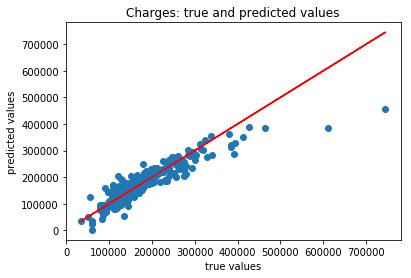

Mean absolute error of the prediction is: 22070.514820739652
Mean squared error of the prediction is: 1201814061.1502495
Root mean squared error of the prediction is: 34667.189980588984
Mean absolute percentage error of the prediction is: 13.128920251045223


In [29]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

- While the prediction model seems to work for smaller values, prediciton of higher sales prices is way off
- MAE, MSE, and RMSE are all very high in value.
- Smaller predicted values stay close to the line of fit and fairly consistent in variance, however values past 300,000 become much more irregular. Since our valuation metrics are quite high and adjusted R value leaves room for improvement, we cannot say this is a satisfactory predictive model.

To imporve out model, we add two new terms are created from the summation of the house square footage and an interaction term of the total square footage and the overall house quality.
The log transform of the sale price data is also taken, since i was found in previous checkpoints that the sale prices were not normally distributed.

In [30]:
housing_reg_df['totalsf'] = housing_reg_df['totalbsmtsf'] + housing_reg_df['firstflrsf'] + housing_reg_df['secondflrsf']

housing_reg_df['int_over_sf'] = housing_reg_df['totalsf'] * housing_reg_df['overallqual']

# Y is the target variable
Y = np.log1p(housing_reg_df['saleprice'])
# X is the feature set
X = housing_reg_df[['overallqual', 'garagecars','overallqual', 'garagecars', 'totalbsmtsf', 'centralair_Y', 'bldgtype_Duplex',
                     'bldgtype_Twnhs','bldgtype_TwnhsE','exterqual_TA','bsmtqual_Fa','bsmtqual_Gd',
                     'bsmtqual_TA','salecondition_Normal','salecondition_Partial', 'totalsf', 'int_over_sf']]

In [31]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     531.2
Date:                Sun, 23 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:33:03   Log-Likelihood:                 637.10
No. Observations:                1460   AIC:                            -1242.
Df Residuals:                    1444   BIC:                            -1158.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.2432      0.053    193.184      0.000      10.139      10.347
overallqual               0.0840      0.004     19.618      0.000       0.076       0.092
garagecars                0.0387      0.004     10.346      0.000       0.031       0.046
overallqual               0.0840      0.004     19.618      0.000       0.076       0.092
garagecars                0.0387      0.004     10.346      0.000       0.031       0.046
totalbsmtsf            -7.48e-05   1.74e-05     -4.309      0.000      -0.000   -4.07e-05
centralair_Y              0.2052      0.018     11.349      0.000       0.170       0.241
bldgtype_Duplex          -0.1089      0.024     -4.587      0.000      -0.155      -0.062
bldgtype_Twnhs           -0.1508      0.025     -6.035      0.000      -0.200      -0.102
bldgtype_TwnhsE          -0.0826      0.016     -5.035      0.000      -0.115      -0.050
exterqual_TA             -0.0540      0.012     -4.421      0.000      -0.078      -0.030
bsmtqual_Fa              -0.2500      0.032     -7.832      0.000      -0.313      -0.187
bsmtqual_Gd              -0.1103      0.017     -6.668      0.000      -0.143      -0.078
bsmtqual_TA              -0.1775      0.019     -9.534      0.000      -0.214      -0.141
salecondition_Normal      0.0900      0.014      6.246      0.000       0.062       0.118
salecondition_Partial     0.1143      0.021      5.355      0.000       0.072       0.156
totalsf                   0.0004   2.29e-05     19.025      0.000       0.000       0.000
int_over_sf           -3.129e-05   2.91e-06    -10.739      0.000    -3.7e-05   -2.56e-05
==============================================================================
Omnibus:                      430.954   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3694.746
Skew:                          -1.124   Prob(JB):                         0.00
Kurtosis:                      10.462   Cond. No.                     4.06e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [33]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     418.9
Date:                Sun, 23 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:33:35   Log-Likelihood:                 510.84
No. Observations:                1168   AIC:                            -989.7
Df Residuals:                    1152   BIC:                            -908.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.13

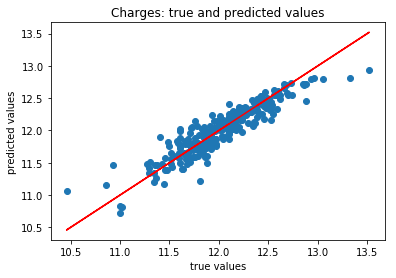

Mean absolute error of the prediction is: 0.11677677032489116
Mean squared error of the prediction is: 0.025365401766745198
Root mean squared error of the prediction is: 0.15926519320537427
Mean absolute percentage error of the prediction is: 0.9763495537638198


In [34]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

We see that adding the sumation and interaction terms as well as the log transform really helped the predictive model. Predicted values fall much more consistently along the line of fit and have a relatively consistent varinace along the line, save for a few outliers.
- R squared and adjusted R values are .849 and .846 respectively.
- MAE, MSE, RMSE, and MAPE are all very low when compared to the previous predictive model.
- F statistic at 418.9 and p-value of 0 is also much better than the previous model.

By the valuation metrics and the substantial improvements to the first model, this predicitve model seems to be satisfactory.